In [1]:
import nltk
import functools
import operator
import nltk
import itertools
import gdelt
from nltk.corpus import stopwords

In [2]:
gd2 = gdelt.gdelt(version=2)

In [3]:
results2 = gd2.Search(['2019 Nov 1'],table='events',coverage=True)
results2

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,883649737,20181101,201811,2018,2018.8247,NaN,NaN,NaN,NaN,NaN,...,4,"Chilliwack, British Columbia, Canada",CA,CA02,12550,49.16670,-121.950,-562560,20191101011500,https://www.theprogress.com/news/after-blackfa...
1,883649738,20181101,201811,2018,2018.8247,NaN,NaN,NaN,NaN,NaN,...,1,India,IN,IN,NaN,20.00000,77.000,IN,20191101011500,https://www.theprogress.com/news/after-blackfa...
2,883649739,20181101,201811,2018,2018.8247,NaN,NaN,NaN,NaN,NaN,...,4,"Chilliwack, British Columbia, Canada",CA,CA02,12550,49.16670,-121.950,-562560,20191101011500,https://www.theprogress.com/news/after-blackfa...
3,883649740,20181101,201811,2018,2018.8247,NaN,NaN,NaN,NaN,NaN,...,1,India,IN,IN,NaN,20.00000,77.000,IN,20191101011500,https://www.theprogress.com/news/after-blackfa...
4,883649741,20181101,201811,2018,2018.8247,NaN,NaN,NaN,NaN,NaN,...,4,"Tuas, Singapore (general), Singapore",SN,SN00,18585,1.32139,103.657,-73725,20191101011500,https://www.tnp.sg/news/singapore/scdf-ragging...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153602,883662815,20191101,201911,2019,2019.8247,apa,APACHE,NaN,NaN,apa,...,1,Suriname,NS,NS,NaN,4.00000,-56.000,NS,20191101023000,https://www.mrt.com/business/energy/article/Ap...
153603,883662816,20191101,201911,2019,2019.8247,gun,GUAN,NaN,NaN,gun,...,1,China,CH,CH,NaN,35.00000,105.000,CH,20191101023000,https://www.freemalaysiatoday.com/category/nat...
153604,883662817,20191101,201911,2019,2019.8247,gun,GUAN,NaN,NaN,gun,...,1,China,CH,CH,NaN,35.00000,105.000,CH,20191101023000,https://www.freemalaysiatoday.com/category/nat...
153605,883662818,20191101,201911,2019,2019.8247,kan,KANNADA,NaN,NaN,kan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191101023000,https://bangaloremirror.indiatimes.com/bangalo...


In [4]:
results2.columns

Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode',
       'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources',
       'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName',
       'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'Actor1Geo_ADM2Code',
       'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID',
       'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode',
       'Actor2Geo_ADM1Code', 'Actor2Geo_ADM2Code

In [6]:
[x for x in list(results2.columns) if "Actor"  in x]

['Actor1Code',
 'Actor1Name',
 'Actor1CountryCode',
 'Actor1KnownGroupCode',
 'Actor1EthnicCode',
 'Actor1Religion1Code',
 'Actor1Religion2Code',
 'Actor1Type1Code',
 'Actor1Type2Code',
 'Actor1Type3Code',
 'Actor2Code',
 'Actor2Name',
 'Actor2CountryCode',
 'Actor2KnownGroupCode',
 'Actor2EthnicCode',
 'Actor2Religion1Code',
 'Actor2Religion2Code',
 'Actor2Type1Code',
 'Actor2Type2Code',
 'Actor2Type3Code',
 'Actor1Geo_Type',
 'Actor1Geo_FullName',
 'Actor1Geo_CountryCode',
 'Actor1Geo_ADM1Code',
 'Actor1Geo_ADM2Code',
 'Actor1Geo_Lat',
 'Actor1Geo_Long',
 'Actor1Geo_FeatureID',
 'Actor2Geo_Type',
 'Actor2Geo_FullName',
 'Actor2Geo_CountryCode',
 'Actor2Geo_ADM1Code',
 'Actor2Geo_ADM2Code',
 'Actor2Geo_Lat',
 'Actor2Geo_Long',
 'Actor2Geo_FeatureID']

In [7]:
list_of_things = results2["SOURCEURL"]

In [8]:
list_of_things[0]

'https://www.theprogress.com/news/after-blackface-scandal-trudeau-shuns-photo-ops-of-trick-or-treating/'

In [9]:
def x_split(x):
    if x.split("/")[-1] is None or x.split("/")[-1] == "" or "=" in x.split("/")[-1]:
        return x.split("/")[-2]
    return x.split("/")[-1]

In [10]:
filt_list_of_things = [x_split(x).split("-") for x in list_of_things]

In [11]:
stop_words = stopwords.words('english')
for n, sent in enumerate(filt_list_of_things):
    filt_list_of_things[n] = [x for x in filt_list_of_things[n] if x not in stop_words and x != ""]

filt_list_of_things = [x for x in filt_list_of_things if len(x) > 1]

In [12]:
length = len(filt_list_of_things)
length

129183

In [13]:
filt_list_of_things.sort()
final_list = list(k for k,_ in itertools.groupby(filt_list_of_things))

In [14]:
x=["iran", "war"]

In [15]:
def list_count(super_list, count_list):
    count = 0
    for sublist in super_list:
        if all(elem in sublist for elem in count_list):
            count = count + 1
    return count

In [16]:
list_count(final_list, x)

1

## Topic Model

TF/IDF Topics

In [17]:
import string
import re

In [18]:
text = "The U.S.-China ‘cold war’ is here — and Beijing may start targeting Washington’s allies, analysts say From a trade fight to a war of words over the origin of the coronavirus, to greater scrutiny of Chinese firms on Wall Street — relations between the U.S. and China have nosedived in recent years. A new “cold war” is here and things could get uglier as other countries get dragged into the conflict, analysts warn. “Things will get worse — perhaps much worse — before they get better. Decoupling is underway,” said Dan Ikenson, director of the Herbert A. Stiefel Center for Trade Policy Studies at the Cato Institute, referring to an economic split between the world’s two largest economies. Beijing could also start targeting America’s allies, as it embarks on what analysts call the “wolf warrior diplomacy.” It is named after a series of hugely-popular movies where Chinese fighters defeat adversaries globally. Most recently, the situation escalated after China proposed a new security law for Hong Kong, a semi-autonomous Chinese territory that has a special trading relationship with the U.S. President Donald Trump swiftly announced that the U.S. will revoke the city’s preferential status. “Hong Kong is no longer sufficiently autonomous to warrant the special treatment that we have afforded the territory” since the former British colony was returned to China in 1997, he said. China does not want to get into a full-scale confrontation with the US at the present time. It wants to concentrate on containing the virus, reviving the economy and pushing through the security law in Hong Kong. U.S.-China relations have been strained since 2018, when the two countries were embroiled in a protracted trade war — which dragged down global growth and culminated in a phase one deal that was signed in January. Their rocky relations started up again early this year, when U.S. President Donald Trump blamed China for the spread of the coronavirus pandemic. Recently, tensions moved to the financial markets. The U.S. Senate passed legislation last month that could restrict Chinese companies from listing on American exchanges or raising money from investors on Wall Street, unless they abide by Washington’s regulatory and audit standards. “Many economic redundancies will emerge as the United States and China replicate efforts and compete for the allegiances of the rest of the world by offering carrots and threatening sticks,” Ikenson said. “That is what is meant by the emergence of a new cold war environment.” Beijing’s ‘wolf diplomacy’ Beijing could use the relatively new strategy, termed “wolf warrior diplomacy” by some analysts, to hit out at those perceived to be on Washington’s side. Christopher Granville from research firm TS Lombard, calls the recent uptick in tensions “Cold War 2.0,” said some U.S. allies might be “repaid with ‘wolf diplomacy’ for perceived affronts to the legitimacy of the Chinese system.” Some of those tactics are already playing out, Granville said in a note. For instance, China suspended some beef imports from Australia after the latter called for a global enquiry into the origins of the coronavirus. ″‘Wolf Warrior diplomacy’ is China’s new no-holds-barred approach to the outside world,” added Edward Lucas of the Center for European Policy Analysis in a note last month. He added: “The backlash against Wolf Warrior diplomacy is growing. China has stoked anger in Australia, Canada, Germany, the Netherlands, and Sweden — to take just a few recent examples.” Just last Friday, Beijing advised its citizens not to travel to Australia, saying there’s racial discrimination and violence against the Chinese in relation to the pandemic. Australia has disputed that, according to Reuters. Elsewhere, the United Kingdom could also find itself on the receiving end of China’s wrath after Britain offered visa options to the Hong Kong people following concerns that China was tightening its grip on the city, Granville added. No full-blown confrontation for now It’s in neither party’s interest to bring their so-called cold war too far at this point, however, say analysts. Beijing will probably limit itself to “a combination of more neutral tit-for-tat and veiled warnings,” said TS Lombard. “While it will react rhetorically, China does not want to get into a full-scale confrontation with the US at the present time. It wants to concentrate on containing the virus, reviving the economy and pushing through the security law in Hong Kong,” Jonathan Fenby of TS Lombard told CNBC in an email. 'Relations with the US have some influence on these issues but are not the main concern right now.' On the part of the U.S., while Trump would likely seek to maximize anti-China sentiment during his presidential campaign, he too may restrain himself ultimately Undoubtedly, the resulting political gains from 'China-bashing' will come at a lower economic cost, at a time when the stock market is strong, said Granville of TS Lombard. Still, 'Trump will remain vigilant about containing that economic cost since the practical effects of unbridled escalation on China – from reduced farm incomes to tanking markets – would outweigh the favourable 'tough guy' impression on his voter base,' he wrote. However, the Trump administration is not likely going to be the only one targeting China. 'There seems to be broad bipartisan support for this new dispensation, which means things probably won’t change much under a Biden administration,' said Cato Institute’s Ikenson, referring to the possibility of a new administration under former U.S. Vice President Joe Biden, who has formally secured a Democratic presidential nomination. Former Singapore senior diplomat Bilahari Kausikan, however, told CNBC last week that he doesn’t think both countries are 'on an inevitable collision course.' 'People forget one big factor — and that’s the nuclear factor. There is a state of nuclear deterrence, and that makes war by design highly improbable,' said Kausikan, dismissing outright conflict between the two world powers. 'Doesn’t mean it cannot happen by accident, but it is improbable,' said Kausikan, who was formerly Singapore’s Permanent Representative to the United Nations, and previously served as permanent secretary at the Ministry of Foreign Affairs in Singapore."

In [19]:
del string

In [20]:
fin_string = re.sub(r'[^\w\s]','',text)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [22]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
vectors = vectorizer.fit_transform([fin_string])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [23]:
new_df = df.transpose()
new_df.columns = ["TF/IDF"]
new_df.sort_values("TF/IDF", ascending=False)

,TF/IDF
china,0.295778
us,0.271130
said,0.246482
war,0.197186
new,0.172537
...,...
greater,0.024648
going,0.024648
globally,0.024648
germany,0.024648


### LDA Analysis

In [130]:
doc_complete = [x_split(x).replace("-", " ") for x in list_of_things if len(x.split("-")) >1]

In [131]:
doc_complete

['after blackface scandal trudeau shuns photo ops of trick or treating',
 'after blackface scandal trudeau shuns photo ops of trick or treating',
 'after blackface scandal trudeau shuns photo ops of trick or treating',
 'after blackface scandal trudeau shuns photo ops of trick or treating',
 'after blackface scandal trudeau shuns photo ops of trick or treating',
 'after blackface scandal trudeau shuns photo ops of trick or treating',
 '1715992',
 'Featured Top Originator  Damon Germanides  Insignia Mortgage Inc ',
 '854605.html',
 '854605.html',
 '854605.html',
 '854605.html',
 '4104762002',
 '854605.html',
 '854605.html',
 '854605.html',
 'ashburn resident say fires are ruining citys history',
 'Featured Top Originator  Damon Germanides  Insignia Mortgage Inc ',
 'four new bikes for wewak police',
 'saudi arabia',
 'saudi arabia',
 'saudi arabia',
 'saudi arabia',
 'saudi arabia',
 'australian aluminium smelters not sustainable due to high power costs rio tinto says',
 'canadian speci

In [132]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]   

In [133]:
doc_clean

[['blackface',
  'scandal',
  'trudeau',
  'shuns',
  'photo',
  'ops',
  'trick',
  'treating'],
 ['blackface',
  'scandal',
  'trudeau',
  'shuns',
  'photo',
  'ops',
  'trick',
  'treating'],
 ['blackface',
  'scandal',
  'trudeau',
  'shuns',
  'photo',
  'ops',
  'trick',
  'treating'],
 ['blackface',
  'scandal',
  'trudeau',
  'shuns',
  'photo',
  'ops',
  'trick',
  'treating'],
 ['blackface',
  'scandal',
  'trudeau',
  'shuns',
  'photo',
  'ops',
  'trick',
  'treating'],
 ['blackface',
  'scandal',
  'trudeau',
  'shuns',
  'photo',
  'ops',
  'trick',
  'treating'],
 ['1715992'],
 ['featured',
  'top',
  'originator',
  'damon',
  'germanides',
  'insignia',
  'mortgage',
  'inc'],
 ['854605html'],
 ['854605html'],
 ['854605html'],
 ['854605html'],
 ['4104762002'],
 ['854605html'],
 ['854605html'],
 ['854605html'],
 ['ashburn', 'resident', 'say', 'fire', 'ruining', 'city', 'history'],
 ['featured',
  'top',
  'originator',
  'damon',
  'germanides',
  'insignia',
  'mort

In [134]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [135]:
dictionary 

In [136]:
from gensim.models.ldamodel import LdaModel

In [ ]:

ldamodel3 = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [61]:
ldamodel3.print_topics(num_topics=3, num_words=3)

NameError: name 'ldamodel3' is not defined

In [32]:
%%time 
ldamodel5 = LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

CPU times: user 34min 35s, sys: 2.14 s, total: 34min 37s
Wall time: 34min 51s


In [62]:
ldamodel5.print_topics(num_topics=5, num_words=3)

NameError: name 'ldamodel5' is not defined

## USA/CHINA

In [41]:
us_chn_data = pd.read_csv("fin_test")

In [42]:
us_chn_data

,SQLDATE,Actor1Code,Actor2Code,EventCode,DATEADDED,ActionGeo_Lat,ActionGeo_Long,NumMentions,AvgTone,QuadClass,GoldsteinScale,NumArticles,SOURCEURL
0,20200301,CHN,USA,256,20200301200000,35.0000,105.000,3,-2.698023,1,-0.3,3,http://www.wboc.com/story/41836455/virus-cases...
1,20200302,CHN,USA,256,20200302000000,35.0000,105.000,6,-2.781947,1,-0.3,6,https://www.wiscnews.com/news/world/virus-acce...
2,20200302,USA,CHN,192,20200302123000,35.0000,105.000,8,-0.351494,4,-9.5,8,https://www.thesundaily.my/opinion/birds-of-a-...
3,20200302,CHN,USA,15,20200302174500,35.0000,105.000,10,-18.243243,1,0.0,10,https://www.wwnytv.com/2020/03/02/robinson-ple...
4,20200302,USA,CHN,15,20200302174500,35.0000,105.000,4,-18.243243,1,0.0,2,https://www.wwnytv.com/2020/03/02/robinson-ple...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,20190416,USA,CHN,174,20200415184500,39.9289,116.388,2,-4.403048,4,-5.0,2,https://thediplomat.com/2020/04/covid-19-will-...
3621,20200416,USA,CHN,163,20200416081500,39.9289,116.388,1,-3.926097,4,-8.0,1,https://www.telegraph.co.uk/politics/2020/04/1...
3622,20200416,CHN,USA,183,20200416190000,39.9289,116.388,2,-7.387863,4,-10.0,2,https://www.taipeitimes.com/News/world/archive...
3623,20200317,USA,CHN,193,20200416153000,39.9289,116.388,4,-3.011204,4,-10.0,4,https://www.japantimes.co.jp/2020/04/17/


## Goldstein Score

In [104]:
import matplotlib.pyplot as plt
from datetime import datetime

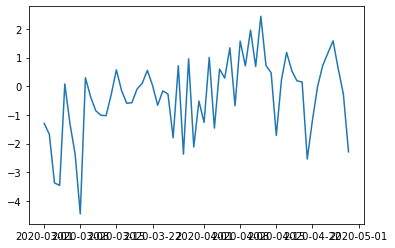

In [127]:
new_data = us_chn_data.groupby('SQLDATE', as_index=False, sort=False)['GoldsteinScale'].mean()
format_str = '%Y%m%d'
new_data.SQLDATE = [datetime.strptime(str(x), format_str) for x in new_data.SQLDATE]
date_data = new_data[new_data.SQLDATE > datetime(2020,2,29)].sort_values(by="SQLDATE")
plt.plot(date_data.SQLDATE, date_data.GoldsteinScale)

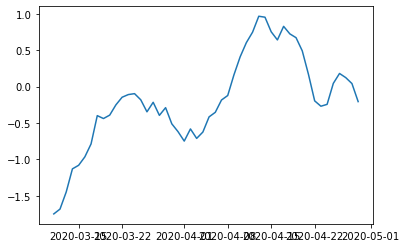

In [129]:
k=10
nd = date_data.copy()
nd["mean"] = date_data.rolling(k).mean()
plt.plot(nd["SQLDATE"][k:], nd["mean"][k:])

## Average Tone

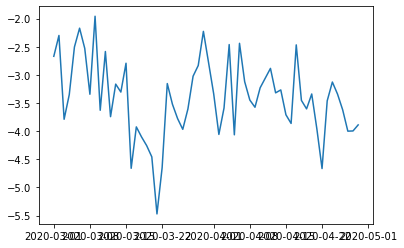

In [121]:
new_data = us_chn_data.groupby('SQLDATE', as_index=False, sort=False)['AvgTone'].mean()

format_str = '%Y%m%d' # The format
new_data.SQLDATE = [datetime.strptime(str(x), format_str) for x in new_data.SQLDATE]

date_data = new_data[new_data.SQLDATE > datetime(2020,2,29)].sort_values(by="SQLDATE")

plt.plot(date_data.SQLDATE, date_data.AvgTone)

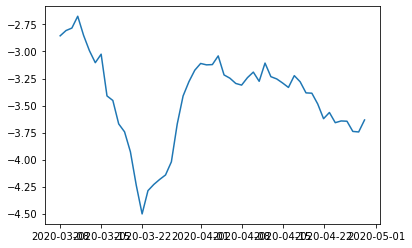

In [126]:
k=7 
nd = date_data.copy()
nd["mean"] = date_data.rolling(k).mean()
plt.plot(nd["SQLDATE"][k:], nd["mean"][k:])

## USA/China

In [80]:
us_doc_complete = [x_split(x).replace("-", " ") for x in us_chn_data["SOURCEURL"] if len(x.split("-")) >1]

In [81]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

In [24]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [82]:
us_doc_clean = [clean(doc).split() for doc in us_doc_complete]   

In [85]:
us_dictionary = corpora.Dictionary(us_doc_clean)
us_doc_term_matrix = [us_dictionary.doc2bow(doc) for doc in us_doc_clean]

In [89]:
us_ldamodel = LdaModel(us_doc_term_matrix, num_topics=3, id2word = us_dictionary, passes=50)

In [92]:
us_ldamodel.print_topics(num_topics=3, num_words=3)

[(0, '0.042*"china" + 0.028*"coronavirus" + 0.025*"trump"'),
 (1, '0.028*"covid" + 0.026*"19" + 0.025*"china"'),
 (2, '0.033*"china" + 0.031*"coronavirus" + 0.011*"u"')]

## US/China TD/IDF

In [96]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
vectors = vectorizer.fit_transform([" ".join(us_doc_complete)])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [100]:
new_df = df.transpose()
new_df.columns = ["TF/IDF"]
new_df.sort_values("TF/IDF", ascending=False).head(20)

,TF/IDF
china,0.505740
coronavirus,0.474789
html,0.444498
us,0.241017
trump,0.179116
covid,0.163312
19,0.152776
chinese,0.132362
d8,0.119850
d9,0.113265


## Random

In [75]:

# Single 15 minute interval pull, output to json format with mentions table
results = gd2.Search(['2019 Nov 1'],table='mentions', coverage=True)
print(len(results))

448157


In [76]:
results

,GLOBALEVENTID,EventTimeDate,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,InRawText,Confidence,MentionDocLen,MentionDocTone,MentionDocTranslationInfo,Extras
0,883657799,20191101020000,20191101040000,1,brudirect.com,https://brudirect.com/news.php?id=79831,2,547,696,621,1,40,2037,2.339181,NaN,NaN
1,883657800,20191101020000,20191101040000,1,brudirect.com,https://brudirect.com/news.php?id=79831,2,547,696,621,0,60,2037,2.339181,NaN,NaN
2,883657801,20191101020000,20191101040000,1,brudirect.com,https://brudirect.com/news.php?id=79831,2,547,696,728,1,100,2037,2.339181,NaN,NaN
3,883669697,20191101033000,20191101040000,1,msn.com,https://www.msn.com/en-ca/finance/topstories/c...,14,3816,3870,3865,1,100,4381,0.137741,NaN,NaN
4,883672640,20191101040000,20191101040000,1,guardian.ng,https://guardian.ng/business-services/what-bre...,11,4616,4660,4644,0,10,5414,-2.505695,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448152,883824027,20191101203000,20191101231500,1,guernseypress.com,https://guernseypress.com/news/uk-news/2019/11...,2,415,-1,380,1,60,3085,0.198413,NaN,NaN
448153,883848133,20191101231500,20191101231500,1,newschannel10.com,https://www.newschannel10.com/2019/11/01/clovi...,4,626,-1,688,1,30,1865,-8.722741,NaN,NaN
448154,883848134,20191101231500,20191101231500,1,kcbd.com,https://www.kcbd.com/2019/11/01/clovis-man-get...,2,382,390,408,0,20,2388,-7.323232,NaN,NaN
448155,883848135,20191101231500,20191101231500,1,americanmachinist.com,https://www.americanmachinist.com/machining-cu...,1,1761,-1,1823,1,30,3879,0.972447,NaN,NaN


In [ ]:
filtered_words = [word for word in functools.reduce(operator.iconcat, filt_list_of_things, []) if word not in stopwords.words('english')]

In [41]:
import requests
from bs4 import BeautifulSoup

In [25]:
results2["SOURCEURL"][0]

'https://www.theprogress.com/news/after-blackface-scandal-trudeau-shuns-photo-ops-of-trick-or-treating/'

In [32]:

for i in range(0,100):
    ret = requests.get(results2["SOURCEURL"][i])
    if ret.status_code == 200:
        break;



In [52]:
ret.url

'https://www.tnp.sg/news/singapore/scdf-ragging-death-warrant-officer-third-person-be-convicted'

In [37]:
ret.content

b'<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema# schema: http://schema.org/">\n<head>\n  <link rel="profile" href="http://www.w3.org/1999/xhtml/vocab" />\n  <meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no">\n  <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png">\n  <link rel="icon" type="image/png" href="/favicon-32x32.png" sizes="32x32">\

In [55]:
import html5lib

In [57]:
soup1 = BeautifulSoup(ret.content, "html.parser")

In [58]:
headline = soup1.find_all('h2', )

In [60]:
headline

[<h2 class="block-title">Popular</h2>,
 <h2 class="card-title"><a href="https://www.tnp.sg/news/singapore/youth-who-was-popular-girls-was-sexual-predator">Sexual predator gets 22 years' jail and 24 strokes for preying on 19 victims, including minors</a></h2>,
 <h2 class="card-title"><a href="https://www.tnp.sg/news/singapore/scdf-ragging-death-officers-argued-over-push">SCDF ragging death: Officers argued over push</a></h2>,
 <h2 class="byline-name"><a href="/author/shaffiq-alkhatib">Shaffiq Alkhatib</a></h2>,
 <h2 class="card-title"><a href="https://www.tnp.sg/news/singapore/nus-students-get-zero-marks-cheating-take-home-exam">NUS students get zero for cheating on take-home exam</a></h2>,
 <h2 class="card-title"><a href="https://www.tnp.sg/news/singapore/man-63-fined-3500-meeting-friends-drink-beer-public">Man, 63, fined $3,500 for meeting friends to drink beer</a></h2>,
 <h2 class="card-title"><a href="https://www.tnp.sg/news/singapore/fishmonger-spits-mutton-seller-tekka-market-frac